In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sb

## Reflect Tables into SQLALchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, desc

In [10]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [65]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
fun_calcs = calc_temps('2016-08-23', '2017-08-23')
fun_calcs

[(58.0, 74.59058295964125, 87.0)]

In [66]:
# Drawing up DF for ploting min, avg and max temps
for_plots_df = pd.DataFrame(fun_calcs, columns=['min_temp(F)', 'avg_temp(F)', 'max_temp(F)'])
for_plots_df

,min_temp(F),avg_temp(F),max_temp(F)
0,58.0,74.590583,87.0


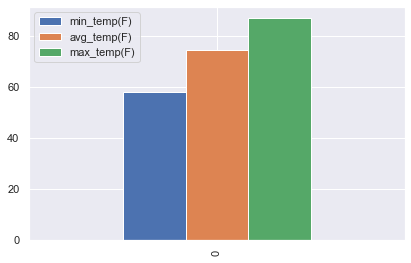

In [64]:
# Plotting the min, avg and max temps from previous query
sb.set()
afor_plots_df.plot(kind="bar")
plt.ylabel = ('Temp (F)')
plt.title = ("Chart for Min, Avg and Max Temp")
plt.show()

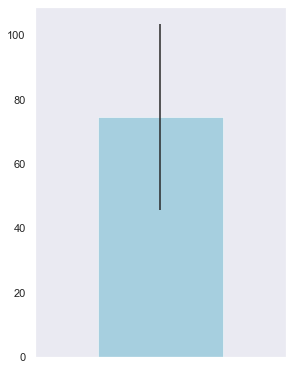

In [72]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# plotting only avg temp
avg_tmp = for_plots_df['avg_temp(F)']

# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
minmax_tmp_clc = for_plots_df.iloc[0]['max_temp(F)'] - for_plots_df.iloc[0]['min_temp(F)']
avg_tmp.plot(kind='bar', yerr=minmax_tmp_clc, figsize=(4,6), alpha=0.5, color='c')
plt.title = ("Trip Avg Temp")
plt.ylabel = ("Temp (F)")
plt.show()

# NOT SURE WHY THE TITLE AND Y-LABEL ARE NOT SHOWING. CAN CHECK LATER

### Daily Rainfall Average

In [47]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prv_srt_date = dt.date(2016,8,1)
prv_end_date = dt.date(2016,8,7)
db_qrys = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp).label('sum')]
rnfl_pr_wthr_stn = session.query(*db_qrys).filter(Measurement.station == station.station).\
            filter(and_(func.date(Measurement.date) <= prv_end_date),func.date(Measurement.date) >= prv_srt_date).\
            group_by(station.name).order_by(desc('sum')).all()
pd.DataFrame(rnfl_pr_wthr_stn, columns=['Station ID','Station Name','Station Lat', 'Station Long', 'Station Elevation', 'Precipitation Sum'])

,Station ID,Station Name,Station Lat,Station Long,Station Elevation,Precipitation Sum
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,6.02
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.65
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,3.59
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,1.30
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.03
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.57
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.18


In [78]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [79]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_dly_nrms = daily_normals('08-01')
# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [ ]:
session.close()